In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import json

# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
from api_keys import weather_api_key
print(weather_api_key)

2ec28ec5c12c80c9758a8c8bb6282bec


In [131]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

600

In [132]:
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url)
weather_json = weather_response.json() 
# print (f"The Weather is {weather_json}")
# print(query_url)

In [204]:
lat = []
lon = []
max_temp = []
clouds = []
wind = []
humidity = []
country=[]
city_name=[]


In [205]:
def  consecutive_numbers(n) :
    list=[i for i in range(len(cities))]
    return (list)
print(consecutive_numbers)

<function consecutive_numbers at 0x000001E5D85A6B70>


In [206]:
for city in cities:
    try:
        weather_response = requests.get(query_url + city)
        text_response = weather_response.json()
        lat.append(text_response['coord']['lat'])
        lon.append(text_response['coord']['lon'])
        max_temp.append(text_response['main']['temp_max'])
        clouds.append(text_response['clouds']['all'])
        humidity.append(text_response['main']['humidity'])
        wind.append(text_response['wind']['speed'])
        country.append(text_response['sys']['country'])
        city_name.append(text_response['name'])
        print(f"{city} {text_response['sys']['country']})
        
    except KeyError:
        print(f"We can't find {city}")  

rikitea PFfound!
paamiut GLfound!
mar del plata ARfound!
berlevag NOfound!
yar-sale RUfound!
victoria HKfound!
ferme-neuve CAfound!
oranjemund NAfound!
sambava MGfound!
maltahohe NAfound!
opuwo NAfound!
bluff NZfound!
imeni poliny osipenko RUfound!
We can't find kegayli
belmonte BRfound!
hilo USfound!
vila velha BRfound!
We can't find sentyabrskiy
We can't find taolanaro
We can't find buqayq
ushuaia ARfound!
cidreira BRfound!
oparino RUfound!
tual IDfound!
barrow USfound!
saint-pierre REfound!
punta arenas CLfound!
porbandar INfound!
geraldton AUfound!
maniitsoq GLfound!
albany USfound!
pekan MYfound!
ribeira grande PTfound!
thompson CAfound!
otradnoye RUfound!
port elizabeth ZAfound!
richards bay ZAfound!
hobart AUfound!
cavalcante BRfound!
iqaluit CAfound!
port hedland AUfound!
quatre cocos MUfound!
egvekinot RUfound!
saint-philippe REfound!
We can't find attawapiskat
arraial do cabo BRfound!
burnie AUfound!
avarua CKfound!
esperance AUfound!
salalah OMfound!
neuquen ARfound!
makow m

ayna PEfound!
havelock USfound!
madimba TZfound!
boddam GBfound!
arroyo ESfound!
We can't find inderborskiy
consett GBfound!
sechura PEfound!
carutapera BRfound!
kushima JPfound!
prainha BRfound!
gamba GAfound!
sotnikovskoye RUfound!
veraval INfound!
bria CFfound!
robe AUfound!
bilma NEfound!
zaoyang CNfound!
northam GBfound!
ust-ilimsk RUfound!
kokstad ZAfound!
We can't find khonuu
hamilton USfound!
fairhope USfound!
la palma USfound!
emba KZfound!
We can't find halalo
benoy TDfound!
garowe SOfound!
omidiyeh IRfound!
hami CNfound!
husavik ISfound!
fomboni KMfound!
burley USfound!
mecca SAfound!
quelimane MZfound!
cayenne GFfound!
akdepe TMfound!
along INfound!
mazagao BRfound!
nyurba RUfound!
urussanga BRfound!
sosnogorsk RUfound!
bestobe KZfound!
esmeraldas BRfound!
takab IRfound!
brunico ITfound!
chicama PEfound!
shingu JPfound!
alofi NUfound!
mahenge TZfound!
bartow USfound!
mae ramat THfound!
We can't find galiwinku
lewiston USfound!
chuy UYfound!
krasnokamensk RUfound!
tateyama J

In [207]:
len(city_name)

548

In [208]:
weather_df = pd.DataFrame(
        {
            "City": city_name,
            "Lat": lat,
            "Lng": lon,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind,
            "Country": country
        }
)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Rikitea,-23.1203,-134.9692,26.60,67,97,2.90,PF
1,Paamiut,61.9940,-49.6678,0.94,82,74,3.92,GL
2,Mar del Plata,-38.0023,-57.5575,23.00,60,75,3.09,AR
3,Berlevåg,70.8578,29.0864,-6.00,79,75,4.12,NO
4,Yar-Sale,66.8333,70.8333,-40.76,80,16,2.04,RU
...,...,...,...,...,...,...,...,...
543,Lokosovo,61.1333,74.8167,-37.60,81,43,2.04,RU
544,Olafsvik,64.8945,-23.7142,0.84,93,100,0.75,IS
545,Acarí,-15.4311,-74.6158,27.52,48,0,4.54,PE
546,Grand Gaube,-20.0064,57.6608,25.56,82,0,0.89,MU


In [209]:
weather_df.to_csv("Weather_Output_1.csv")

In [210]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,19.705359,14.752194,9.258175,73.306569,52.425182,3.771606
std,34.099769,90.293829,18.732172,19.367914,40.154226,2.560016
min,-54.800000,-179.166700,-45.880000,10.000000,0.000000,0.140000
25%,-9.699350,-63.057275,-2.000000,64.000000,6.000000,1.787500
50%,22.243050,17.531000,15.160000,78.000000,58.000000,3.330000
75%,48.828125,93.487500,25.000000,87.000000,93.000000,5.140000
max,78.218600,179.316700,34.000000,100.000000,100.000000,13.380000


In [211]:
(weather_df["Humidity"] > 100).value_counts()

False    548
Name: Humidity, dtype: int64

In [212]:
print(weather_df["Humidity"].max())

100


In [216]:
weather_df["Date"] = '2021-01-25'
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [219]:
weather_df.loc[:, 'Date'] = pd.to_datetime(weather_df.Date)

City                  object
Lat                  float64
Lng                  float64
Max Temp             float64
Humidity               int64
Cloudiness             int64
Wind Speed           float64
Country               object
Date          datetime64[ns]
dtype: object

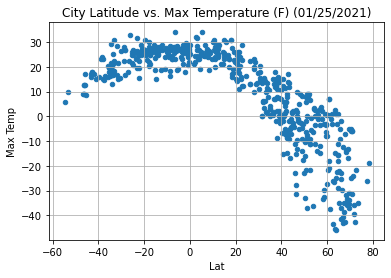

In [255]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, title="City Latitude vs. Max Temperature (F) (01/25/2021)")
plt.show()

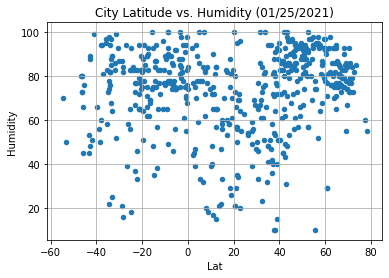

In [256]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, title="City Latitude vs. Humidity (01/25/2021)")
plt.show()

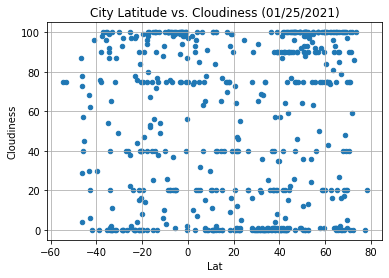

In [258]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, title="City Latitude vs. Cloudiness (01/25/2021)")
plt.show()

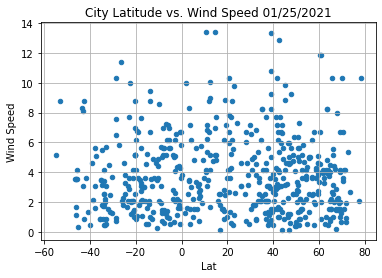

In [260]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, title="City Latitude vs. Wind Speed 01/25/2021")
plt.show()

In [266]:
north_hem_df = weather_df[weather_df["Lat"]>=0]

In [275]:
north_hem_df.rese

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 1 to 547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        359 non-null    object        
 1   Lat         359 non-null    float64       
 2   Lng         359 non-null    float64       
 3   Max Temp    359 non-null    float64       
 4   Humidity    359 non-null    int64         
 5   Cloudiness  359 non-null    int64         
 6   Wind Speed  359 non-null    float64       
 7   Country     359 non-null    object        
 8   Date        359 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.0+ KB


In [285]:
south_hem_df = weather_df[weather_df["Lat"]<0]
south_hem_df.reset_index(drop=True, inplace=True)

In [287]:
south_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        189 non-null    object        
 1   Lat         189 non-null    float64       
 2   Lng         189 non-null    float64       
 3   Max Temp    189 non-null    float64       
 4   Humidity    189 non-null    int64         
 5   Cloudiness  189 non-null    int64         
 6   Wind Speed  189 non-null    float64       
 7   Country     189 non-null    object        
 8   Date        189 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 13.4+ KB


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 189 and the array at index 1 has size 548

The r-squared is: 0.41362889855323276


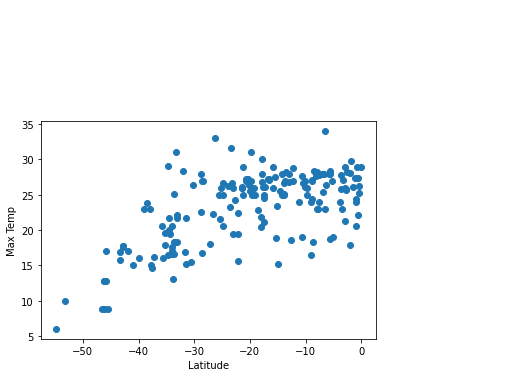

In [293]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values= x_values * slope * intercept
line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
plt.scatter(x_values_south, y_values_south)
plt.annotate(line_eq, (0, 50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print (f"The r-squared is: {rvalue**2}")
plt.show()

In [295]:
south_hem_df.reset_index(drop=True, inplace=True)

The r-squared is: 0.41362889855323276


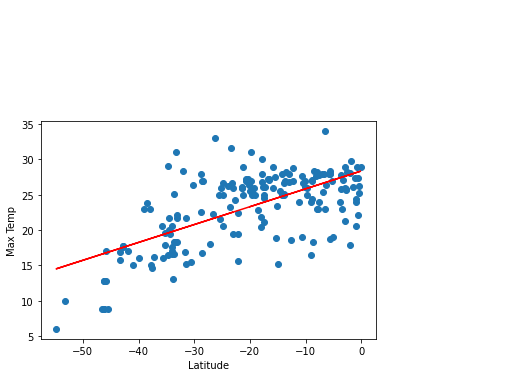

In [298]:
x_values_south = south_hem_df["Lat"]
y_values_south = south_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()